
=== Cross-Validation ===
Fold R² scores: ['0.8633', '0.0022', '0.4958', '0.5035', '-0.7176']
Average R²: 0.2295

=== Test Set Performance ===
MSE: 8753248.65
R²: 0.8891


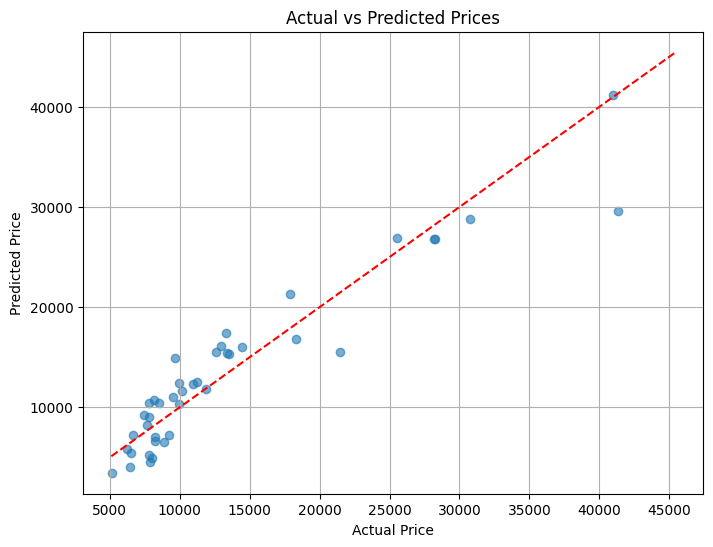

In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Load and prepare data
data = pd.read_csv("encoded_car_data.csv")

# Simple preprocessing
data = pd.get_dummies(data, drop_first=True)      # Handle categorical variables

# 2. Split data
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Evaluate with cross-validation (simple version)
print("\n=== Cross-Validation ===")
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Fold R² scores: {[f'{score:.4f}' for score in cv_scores]}")
print(f"Average R²: {cv_scores.mean():.4f}")

# 5. Test set evaluation
y_pred = model.predict(X_test)
print("\n=== Test Set Performance ===")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")

# 6. Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()